In [1]:
from problems.waveguide import Waveguide
import numpy as np

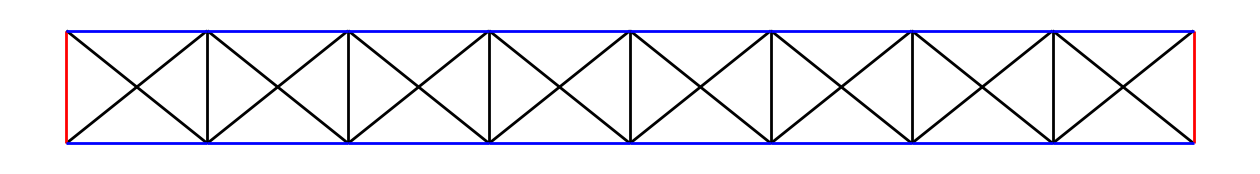

In [2]:
waveguide = Waveguide(lc=1.41)
waveguide.plot(line_width=2)

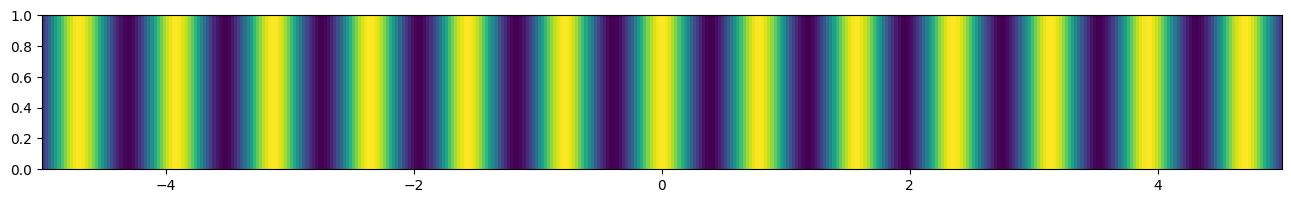

In [5]:
k = 8
waveguide.plot_field(lambda x, y: np.real(np.exp(1j*k*x)), N=400)

In [3]:
from trefftz.fem import BoundaryCondition
{"Gamma": BoundaryCondition.SoundHard,
 "S": BoundaryCondition.Radiating}

{'Gamma': <BoundaryCondition.SoundHard: 1>,
 'S': <BoundaryCondition.Radiating: 3>}